In [26]:
import pandas as pd #pip install pandas
import numpy as np #pip install numpy
import seaborn as sns #pip install seaborn
import matplotlib.pyplot as plt #pip install matplotlib
from sklearn.model_selection import train_test_split #pip install scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression #pip install scikit-learn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #pip install scikit-learn
import tkinter as tk #pip install tk
from tkinter import messagebox
from tkinter import ttk #pip install ttkthemes

# **1. Load the Dataset**

In [27]:
data = pd.read_csv('data/Predicting Solar Power Output using Linear Regression.csv')
data.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


# **2. Data Exploration**

**Dataset Info**

In [28]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

**Missing Values Per Column**

In [29]:
data.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

**Duplicate Rows**

In [30]:
data.duplicated().sum()

np.int64(0)

# **3. Data Preprocessing**

**Drop duplicates**

In [31]:
data = data.drop_duplicates()

**Handle missing values (simple imputation with mean)**

In [32]:
data.fillna(data.mean(), inplace=True)

# **4. Data Visualization**

**Distribution of Target Variable**

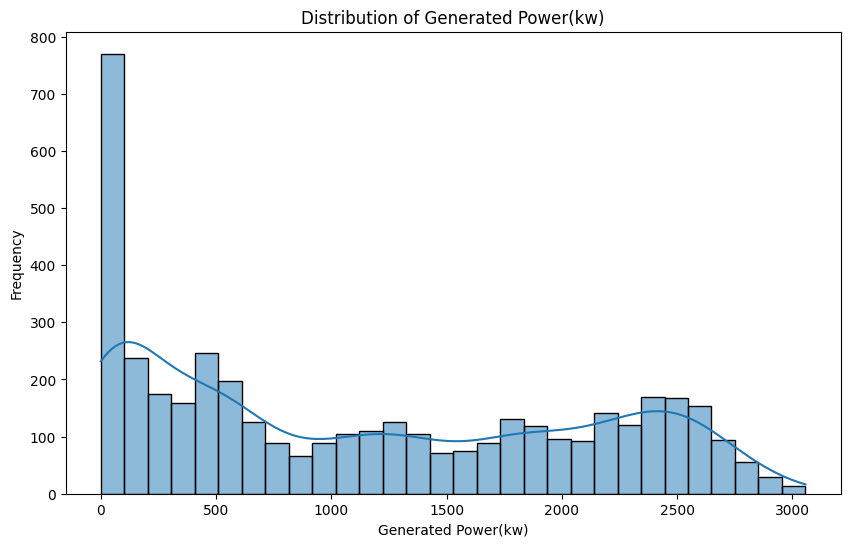

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data['generated_power_kw'], bins=30, kde=True)
plt.title('Distribution of Generated Power(kw)')
plt.xlabel('Generated Power(kw)')
plt.ylabel('Frequency')
plt.show()

**Pairplot (Feature Relationships)**

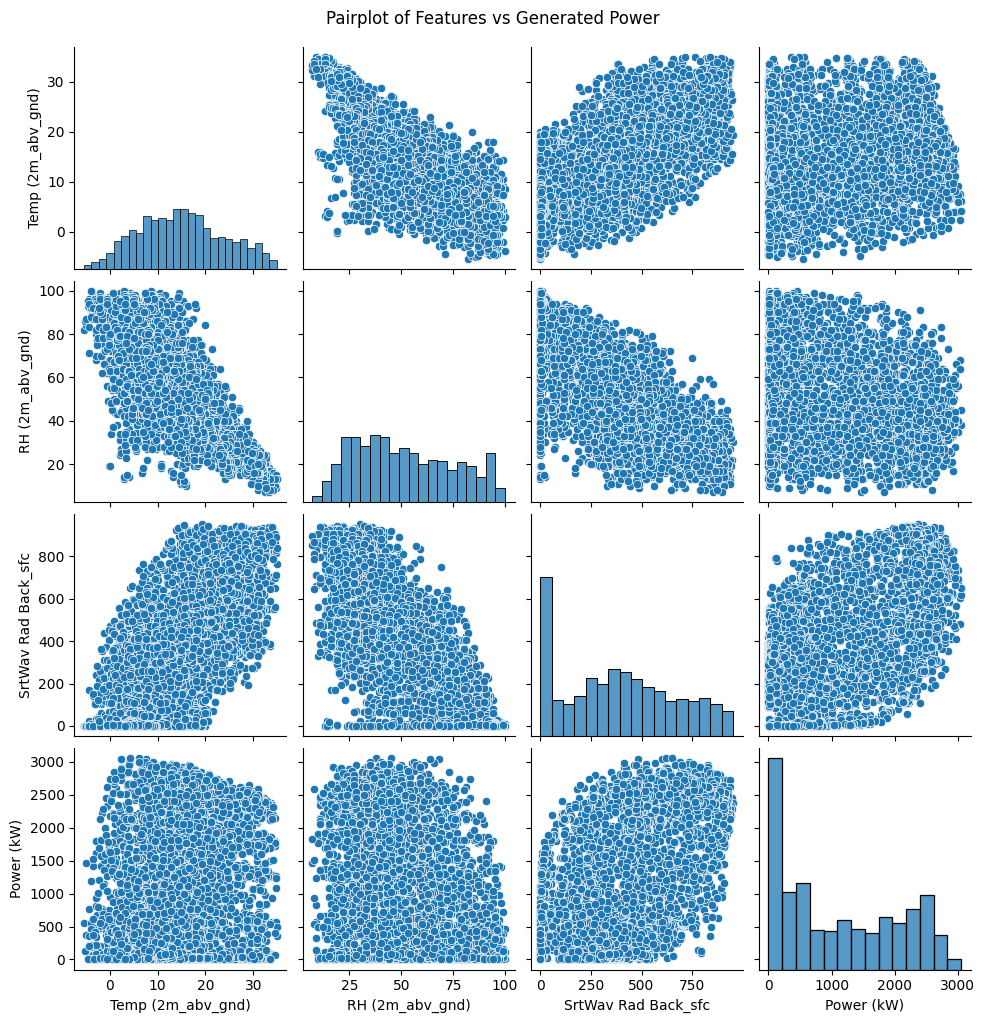

In [34]:
data_short = data.rename(columns={
    'temperature_2_m_above_gnd': 'Temp (2m_abv_gnd)',
    'relative_humidity_2_m_above_gnd': 'RH (2m_abv_gnd)',
    'shortwave_radiation_backwards_sfc': 'SrtWav Rad Back_sfc',
    'generated_power_kw': 'Power (kW)'
})

# Pairplot with shorter labels
sns.pairplot(
    data_short[['Temp (2m_abv_gnd)', 'RH (2m_abv_gnd)', 'SrtWav Rad Back_sfc', 'Power (kW)']])
plt.suptitle("Pairplot of Features vs Generated Power", y=1.02)
plt.show()

**Heat Map**

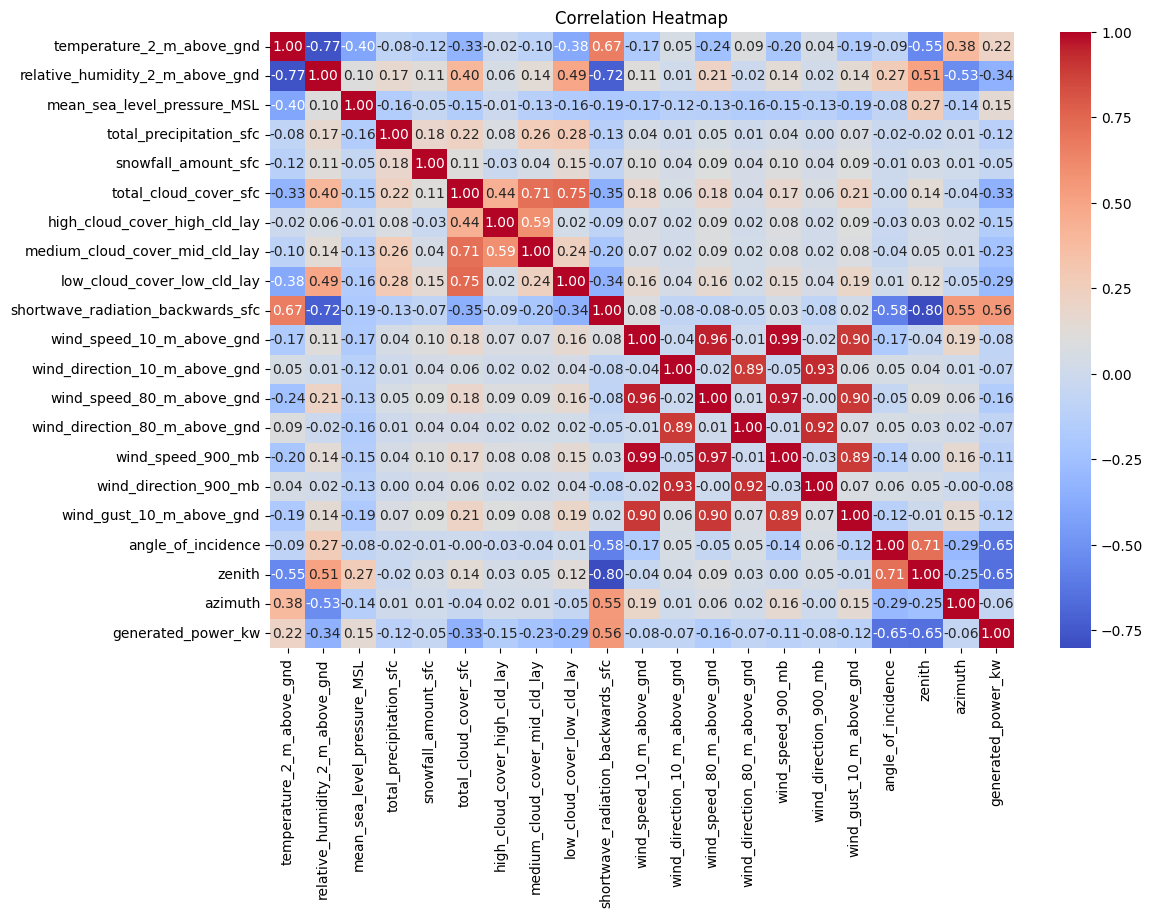

In [35]:
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

**Histogram**

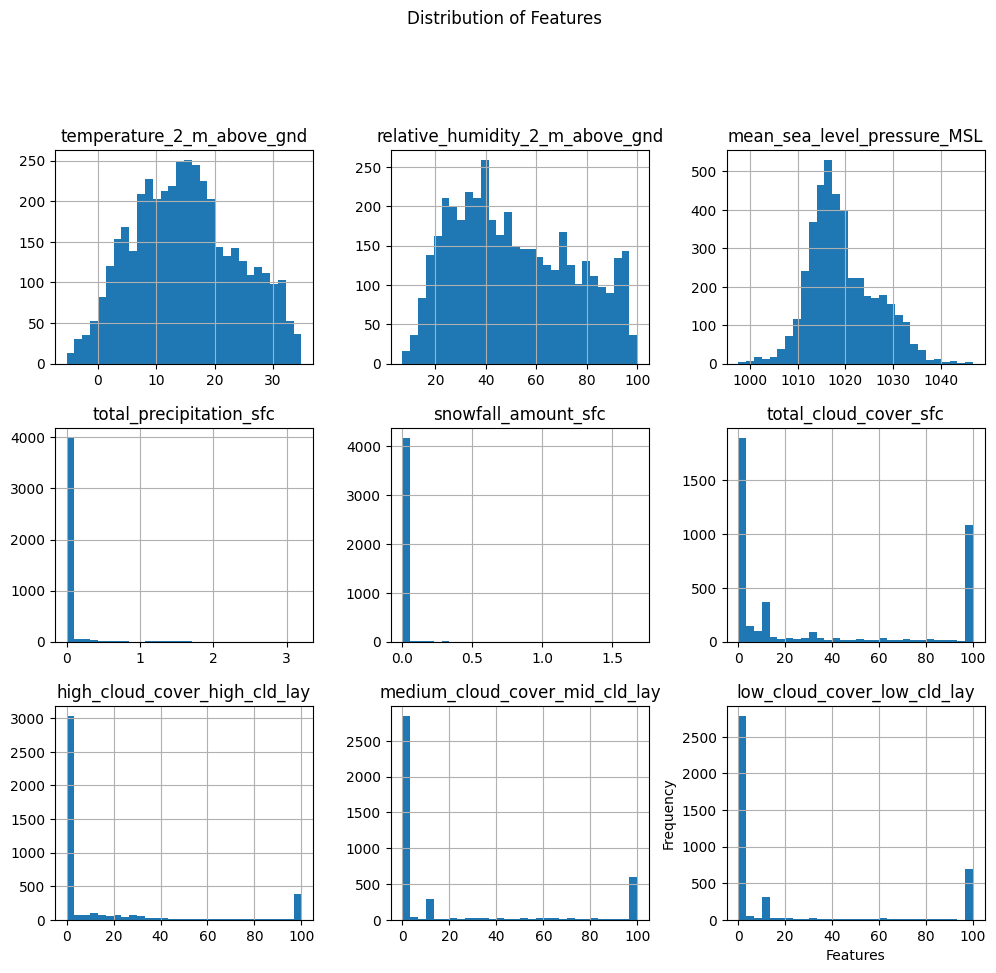

In [36]:
data[data.columns[:9]].hist(figsize=(12, 10), bins=30)
plt.suptitle('Distribution of Features', y=1.02)
plt.xlabel("Features")
plt.ylabel("Frequency")
plt.show()

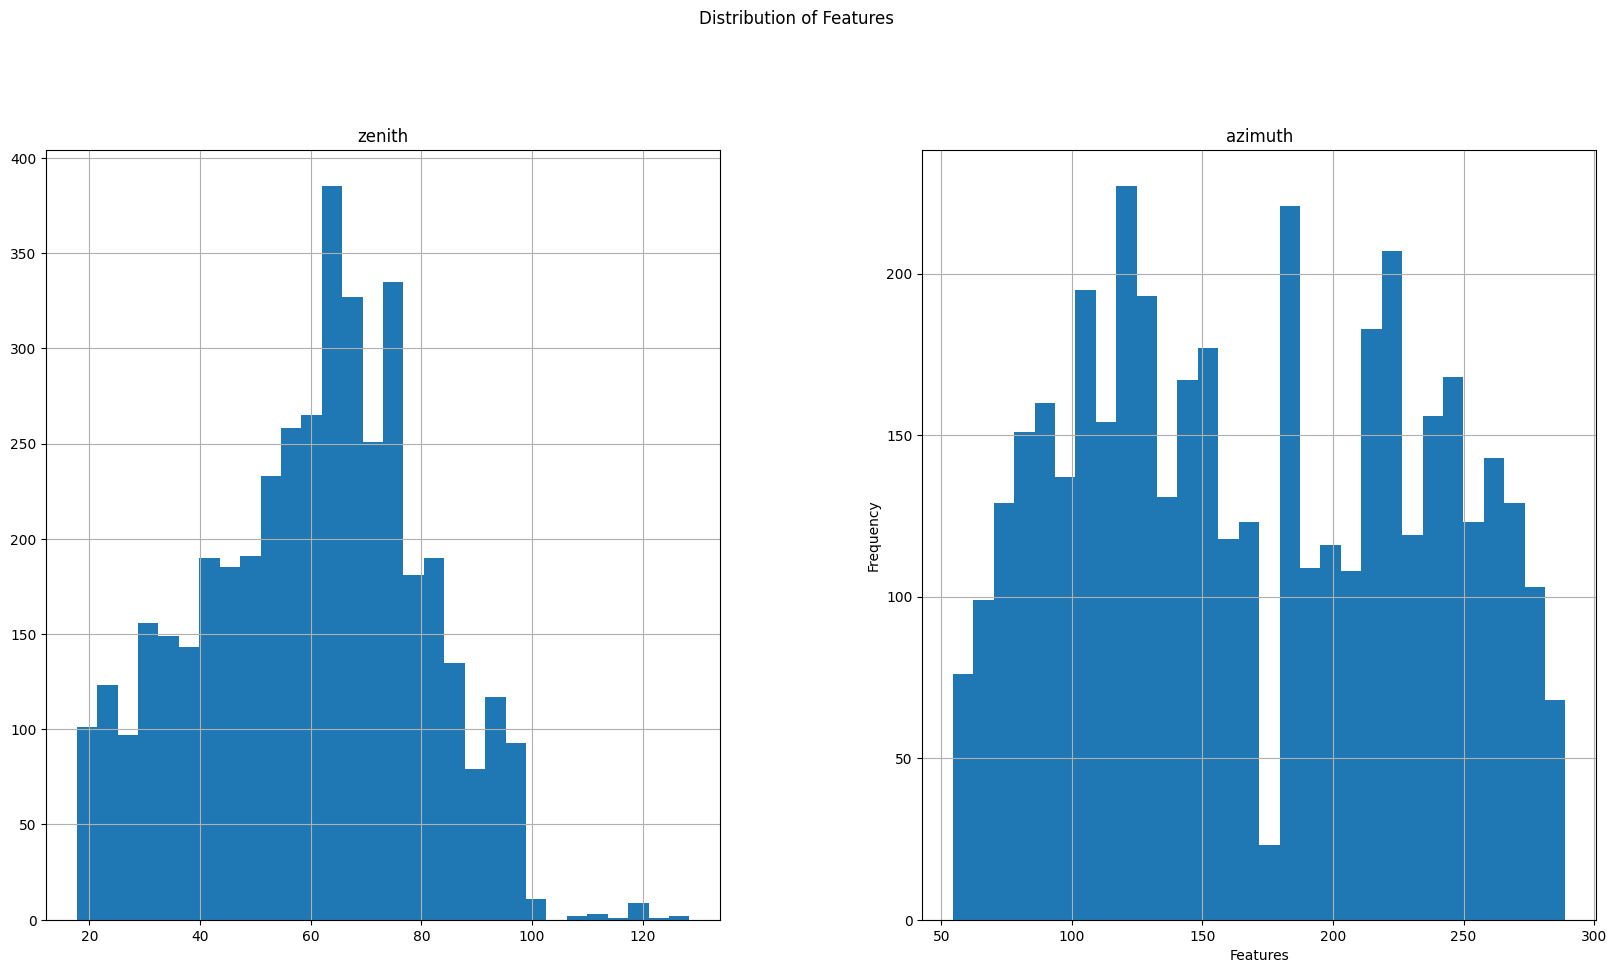

In [37]:
data[data.columns[18:20]].hist(figsize=(20, 10), bins=30)
plt.suptitle('Distribution of Features', y=1.02)
plt.xlabel("Features")
plt.ylabel("Frequency")
plt.show()

**Bevariate Analysis**

**Scatter plot**

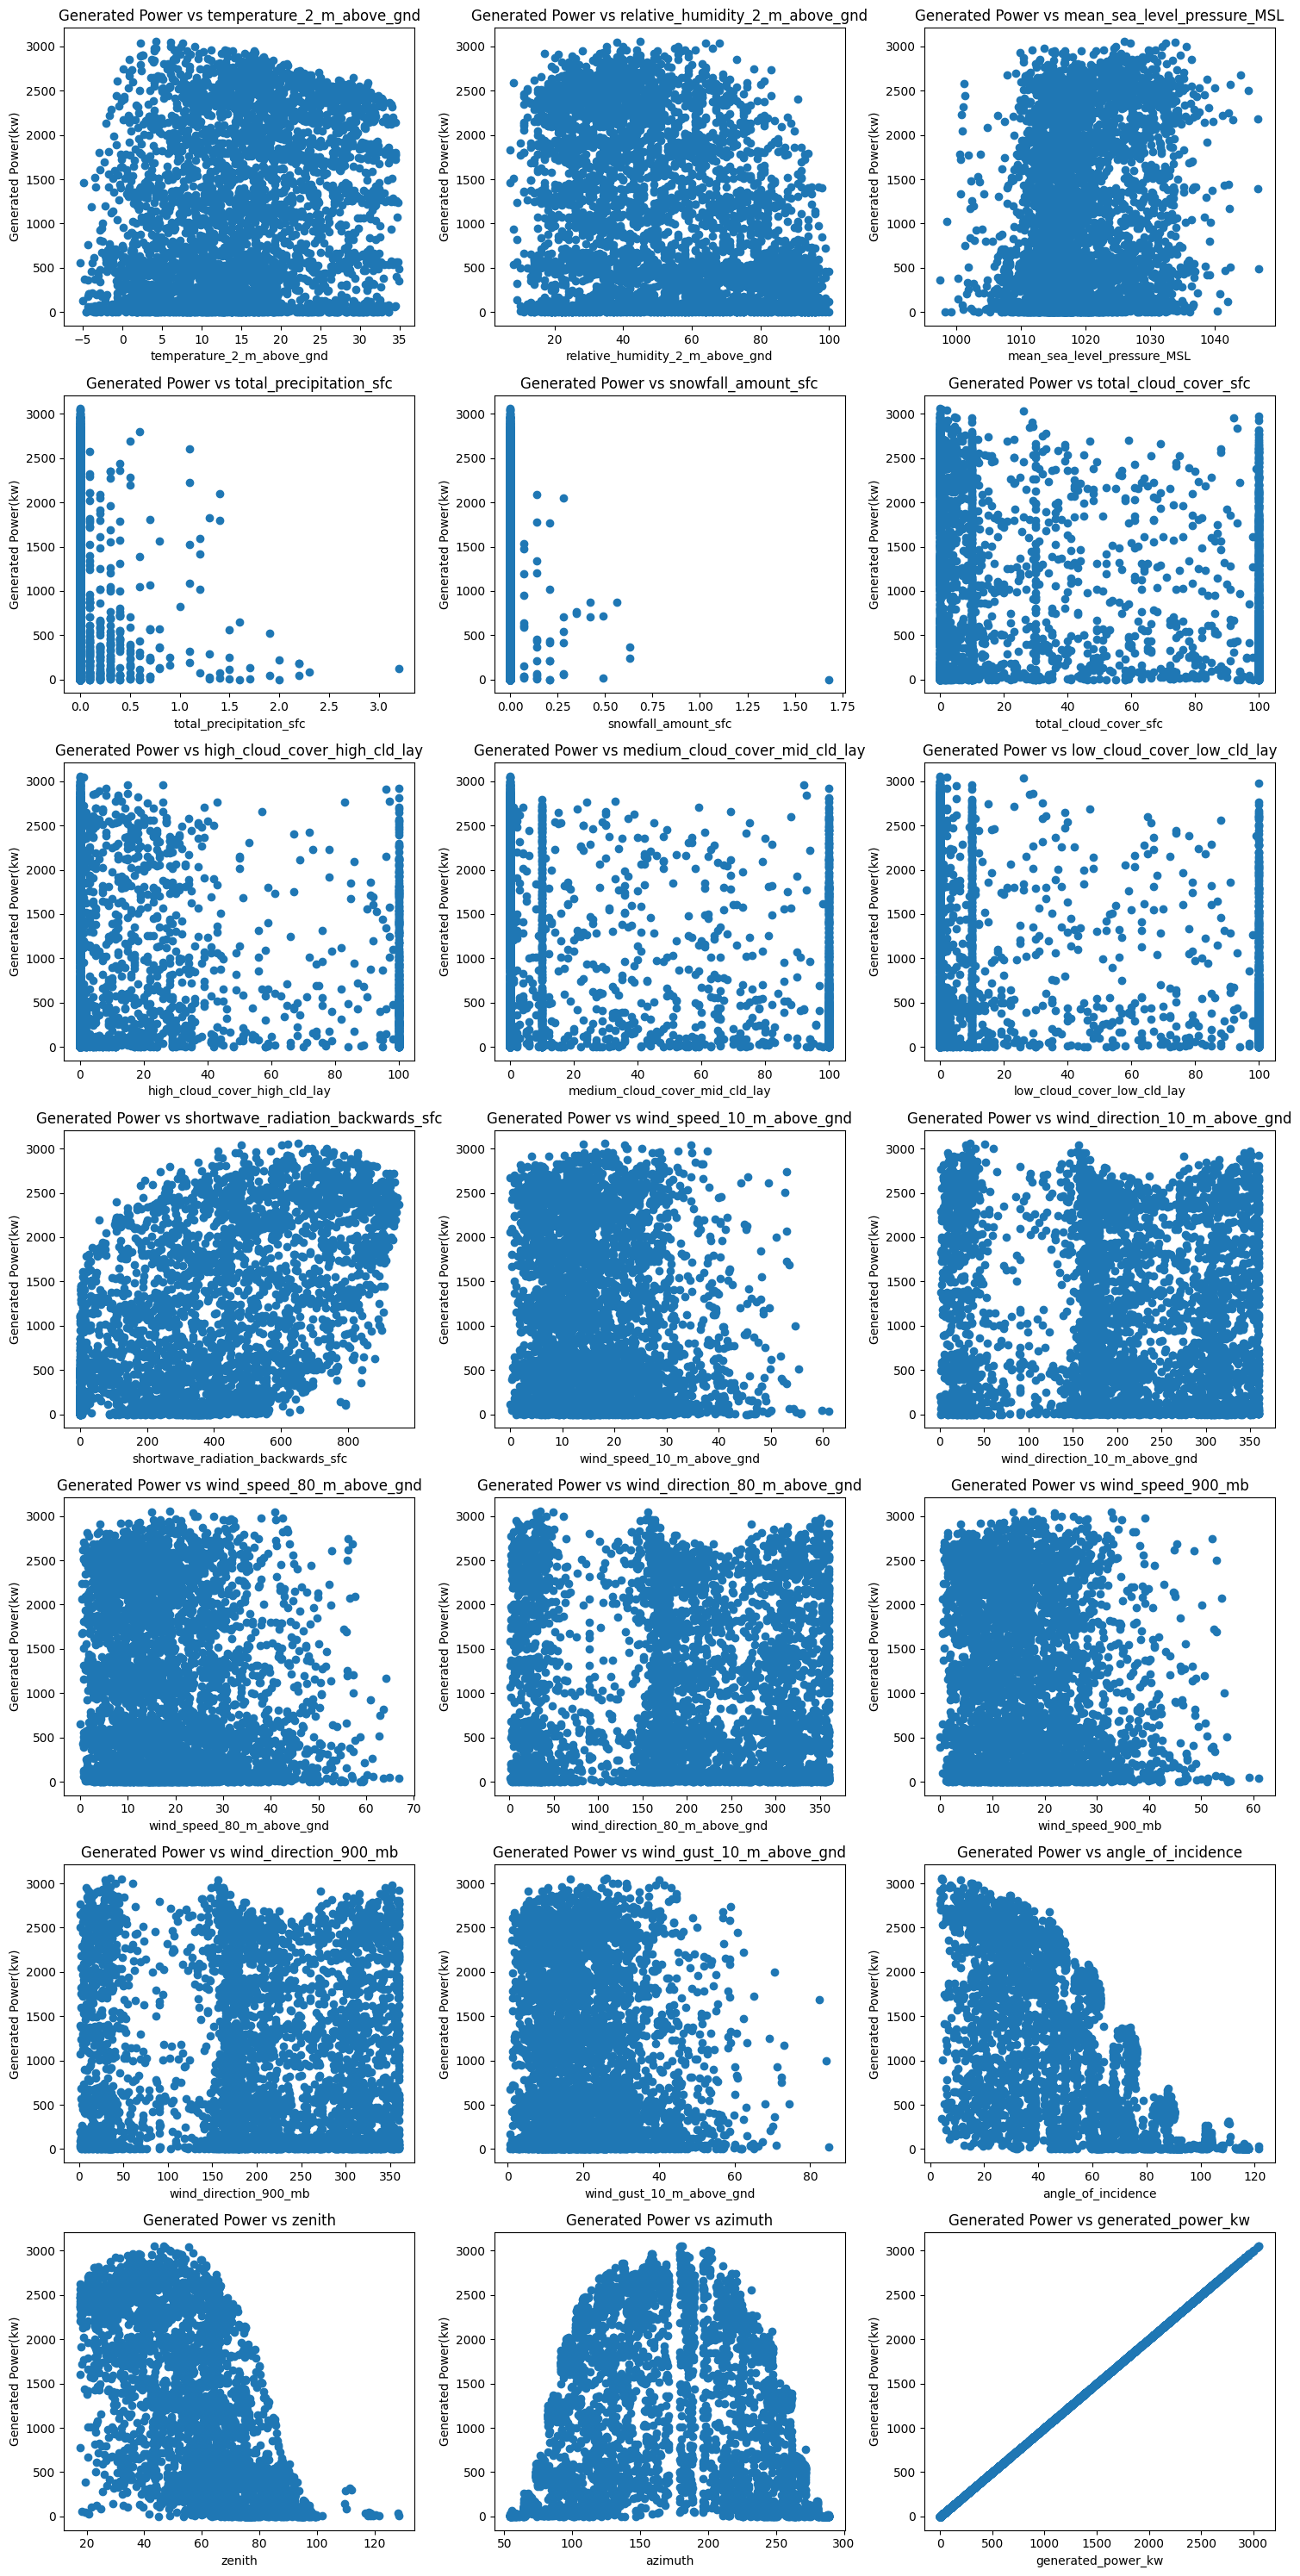

In [38]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(data.columns):
    plt.subplot(7, 3, i+1)
    plt.scatter(data[column], data['generated_power_kw'])
    plt.title(f"Generated Power vs {column}")
    plt.xlabel(column)
    plt.ylabel('Generated Power(kw)')
plt.tight_layout()
plt.show()

**Outliers**

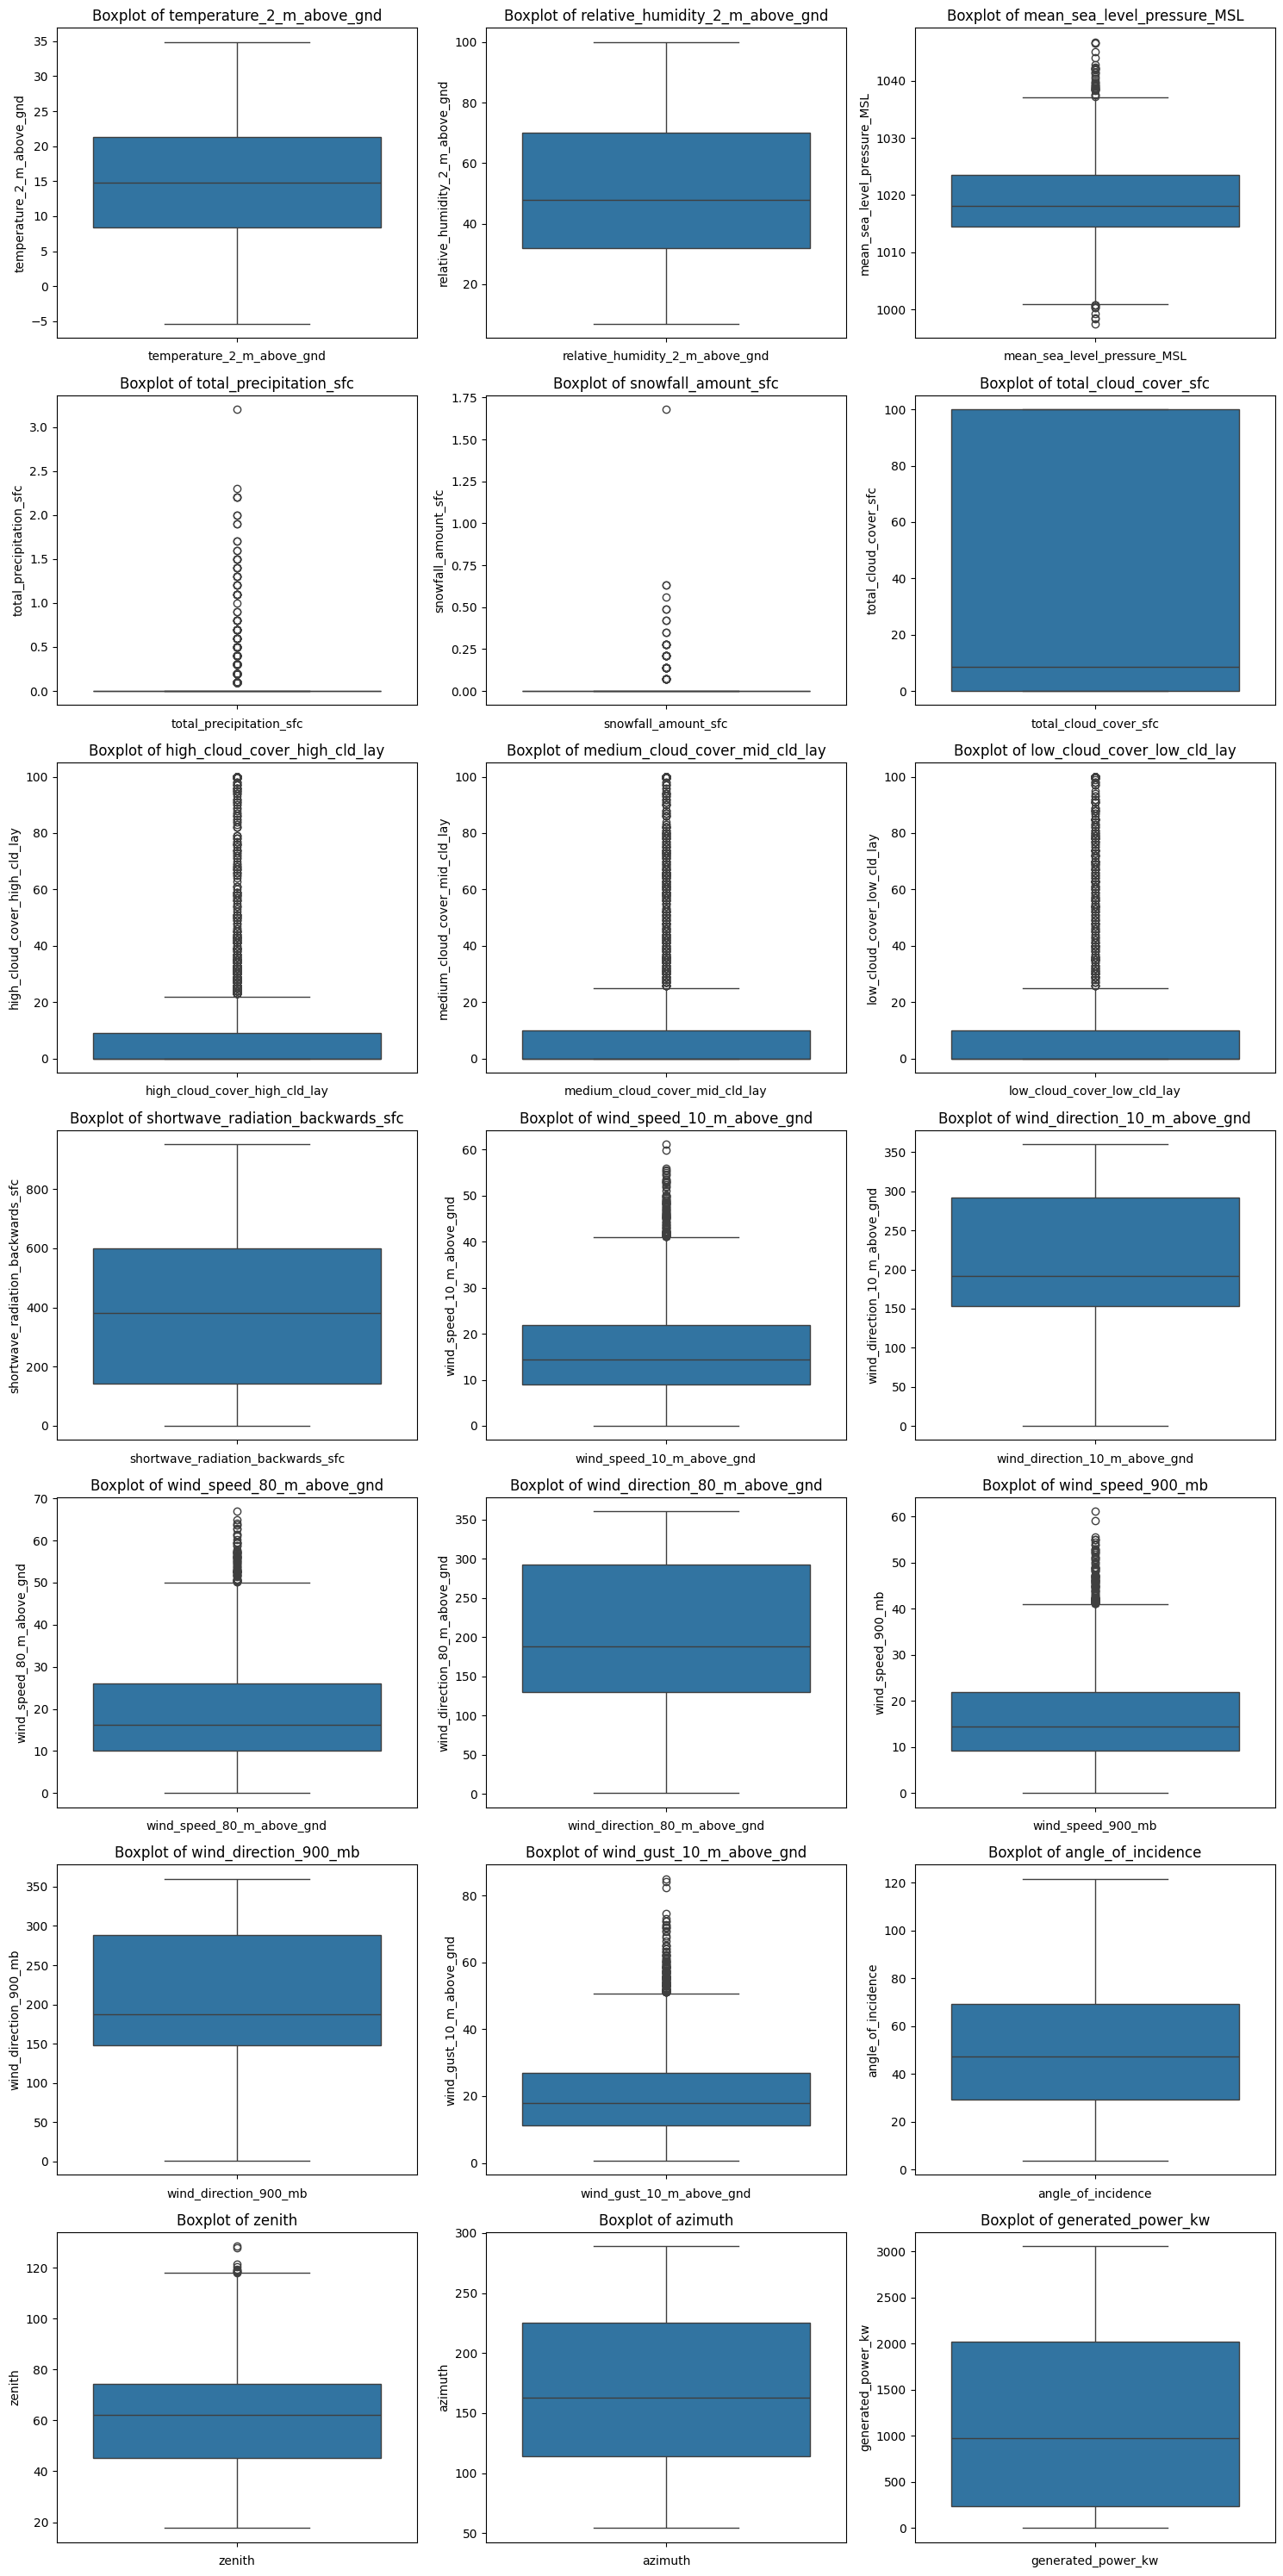

In [39]:
plt.figure(figsize=(15,30))
for i, column in enumerate(data.columns):
    plt.subplot(7, 3, i+1)
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
plt.tight_layout()
plt.show()

# **5. Model Evaluation**

**Define Features (X) and Target (y)**

In [44]:
X = data.drop(['generated_power_kw'], axis=1)
y = data['generated_power_kw']

**Split Data into Training and Testing Sets**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Train Linear Regression Model**

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Make Predictions**

In [47]:
y_pred = model.predict(X_test)

**Evaluate Model Performance**

In [48]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 391.7926956840309


In [49]:
y_pred_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f'Mean Absolute Error: {mae_train}')

Mean Absolute Error: 392.4211815977402


In [50]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Model Performance")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

Model Performance
Root Mean Squared Error: 507.5323218220518
R-squared Score: 0.7180084563489006


# **6. Visualization - Actual vs Predicted Values**

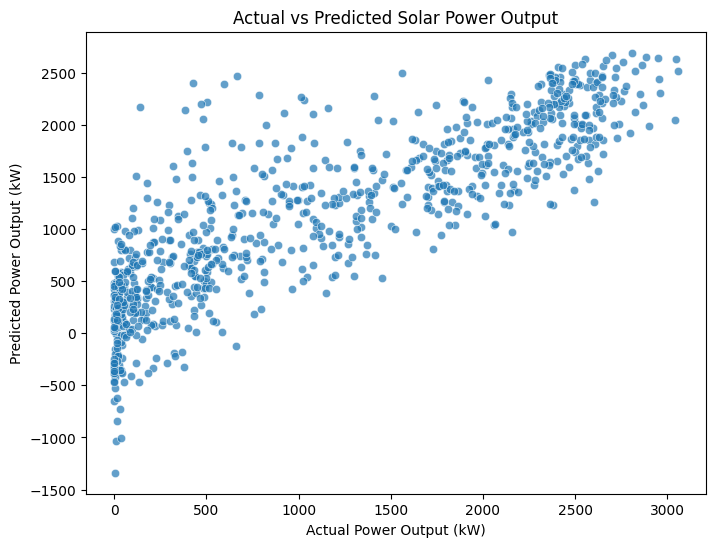

In [51]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Power Output (kW)")
plt.ylabel("Predicted Power Output (kW)")
plt.title("Actual vs Predicted Solar Power Output")
plt.show()

# **7. Interactive User Input for Prediction**

In [52]:
def predict_power():
    try:
        input_values = [float(entries[col].get()) for col in X.columns]
        input_df = pd.DataFrame([input_values], columns=X.columns)
        prediction = model.predict(input_df)[0]
        messagebox.showinfo("Prediction Result", f"Predicted Power Output: {prediction:.2f} kW")
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values.")

# Create GUI Window
root = tk.Tk()
root.title("Solar Power Output Prediction")
root.geometry("450x600")

# Create a scrollable frame
canvas = tk.Canvas(root)
scrollbar = tk.Scrollbar(root, orient="vertical", command=canvas.yview)
scrollable_frame = ttk.Frame(canvas)

scrollable_frame.bind(
    "<Configure>",
    lambda e: canvas.configure(
        scrollregion=canvas.bbox("all")
    )
)

canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")
canvas.configure(yscrollcommand=scrollbar.set)

canvas.pack(side="left", fill="both", expand=True)
scrollbar.pack(side="right", fill="y")

entries = {}
tk.Label(scrollable_frame, text="Enter feature values:").pack(pady=10)
for col in X.columns:
    tk.Label(scrollable_frame, text=col).pack()
    entry = tk.Entry(scrollable_frame)
    entry.pack()
    entries[col] = entry

# Predict Button
tk.Button(scrollable_frame, text="Predict", command=predict_power).pack(pady=20)

# Run GUI
root.mainloop()
